# Functions

In [1]:
def Kauffmann(x):
    return 0.61/(x-0.05)+1.3

def Kewley(x):
    return 0.61/(x-0.47)+1.19

def Stasinska(x):
    # doing this because apparently math.tanh cant handle arrays
    y = []
    for i in range(len(x)):
        y.append((-30.787+1.1358*x[i]+0.27297*x[i]**2)*math.tanh(5.7409*x[i])-31.093)
    return y

def Schawinski(x):
    return 1.05*x+0.45

def horizontal(x, a):
    return 0*x+a

def vertical(y, a):
    return 0*y+a

# Plots parameters

In [2]:
params = {'font.size': 12,
          'figure.figsize': (8.,6.),
          'axes.labelsize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'grid.linestyle': ''
         }

# Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set_theme(style="whitegrid")

# Importing data

In [4]:
data_raw = pd.read_csv('../../Data/Match07_smalldoubleclean_emlines.csv')

In [5]:
data_raw

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,MAG_ABSOLUTE_I,MAG_ABSOLUTE_Z,MAG_ABSOLUTE_Y,MAG_ABSOLUTE_J,MAG_ABSOLUTE_H,MAG_ABSOLUTE_K,UV_CLASS_YI2011,TYPE,BPT_CLASS,WHAN_CLASS
0,585610,588848899914268877,183.6357,-0.180381,3.5,4.62,21.0320,0.0486,2,19.7814,...,-21.790239,-21.937685,-21.534065,-21.671768,-21.333374,-21.381876,RSF,3,SF,SF
1,585622,588848899914334317,183.7372,-0.046642,3.5,4.62,20.2965,0.0263,0,18.8096,...,-20.539217,-20.850392,-20.399912,-20.425870,-20.188683,-19.950501,RSF,3,SF,SF
2,585630,588848899914334392,183.8403,-0.045170,3.5,4.62,20.6158,0.0314,2,19.4969,...,-21.501279,-21.632659,-21.099273,-21.082411,-20.789069,-20.824911,RSF,3,SF,SF
3,585637,588848899914334460,183.7989,-0.059996,3.5,5.28,21.5860,0.1193,2,19.8666,...,-22.577848,-22.980033,-22.429262,-22.649492,-22.521685,-22.513193,RSF,3,NaN,Retired/Passive
4,585667,588848899914399953,183.8874,-0.076773,3.5,5.28,21.0229,0.0584,0,19.8678,...,-22.788999,-23.247800,-22.647159,-22.757948,-22.620589,-22.781031,RSF,3,SF,sAGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14326,585409,588848899913810261,182.6236,-0.118058,3.5,5.28,20.4630,0.0418,0,19.7666,...,-20.191305,-20.612478,-20.227940,-20.381691,-20.215257,-20.145758,RSF,3,LINER,Retired/Passive
14327,585436,588848899913875691,182.8106,-0.015192,3.5,4.62,20.2875,0.0338,2,19.1236,...,-20.870720,-20.911356,-20.521808,-20.436937,-20.165621,-20.073729,RSF,3,SF,SF
14328,585450,588848899913875754,182.8055,-0.045858,3.5,5.28,20.5160,0.0413,2,19.6846,...,-21.427449,-21.770306,-21.332929,-21.604374,-21.472820,-21.495194,RSF,3,SF,SF
14329,585465,588848899913941263,182.8369,-0.154758,3.5,5.28,20.5227,0.0387,2,19.7014,...,-22.046238,-22.454552,-21.799156,-21.927908,-21.851561,-21.915446,RSF,3,SF,SF


# Creating data subsets

In [6]:
# BPT diagrams
data_BPT = data_raw[(data_raw['HA_FLUX_COMP']>0) &
                (data_raw['HB_FLUX_COMP']>0) &
                (data_raw['NIIR_FLUX_COMP']>0) &
                (data_raw['OIIIR_FLUX_COMP']>0)]

data_rsf_BPT = data_BPT[data_BPT['UV_CLASS_YI2011']=='RSF']
data_uvweak_BPT = data_BPT[data_BPT['UV_CLASS_YI2011']=='UV_WEAK']
data_uvupturn_BPT = data_BPT[data_BPT['UV_CLASS_YI2011']=='UV_UPTURN']

# WHAN diagrams
data_WHAN = data_raw[(data_raw['HA_FLUX_COMP']>0) &
                (data_raw['NIIR_FLUX_COMP']>0) &
                (data_raw['HA_EW_COMP']>0)]

data_rsf_WHAN = data_WHAN[data_WHAN['UV_CLASS_YI2011']=='RSF']
data_uvweak_WHAN = data_WHAN[data_WHAN['UV_CLASS_YI2011']=='UV_WEAK']
data_uvupturn_WHAN = data_WHAN[data_WHAN['UV_CLASS_YI2011']=='UV_UPTURN']

In [7]:
# heatmaps
data = data_raw[(data_raw['HA_FLUX_COMP']>0) &
                (data_raw['HB_FLUX_COMP']>0) &
                (data_raw['NIIR_FLUX_COMP']>0) &
                (data_raw['OIIIR_FLUX_COMP']>0) & 
                (data_raw['HA_EW_COMP']>0) & 
                (data_raw['HB_EW_COMP']>0) & 
                (data_raw['D4000N']>0)]

data_rsf = data[data['UV_CLASS_YI2011']=='RSF']
data_uvweak = data[data['UV_CLASS_YI2011']=='UV_WEAK']
data_uvupturn = data[data['UV_CLASS_YI2011']=='UV_UPTURN']

# RSF
heatmap_rsf = {}
heatmap_rsf['NUV-r'] = data_rsf['MAG_AB_NUV'].values - data_rsf['MAG_AB_R'].values
heatmap_rsf['FUV-r'] = data_rsf['MAG_AB_FUV'].values - data_rsf['MAG_AB_R'].values
heatmap_rsf['FUV-NUV'] = data_rsf['MAG_AB_FUV'].values - data_rsf['MAG_AB_NUV'].values
heatmap_rsf['M_NUV'] = data_rsf['MAG_ABSOLUTE_NUV'].values
heatmap_rsf['M_FUV'] = data_rsf['MAG_ABSOLUTE_FUV'].values
heatmap_rsf['M_r'] = data_rsf['MAG_ABSOLUTE_R'].values
heatmap_rsf['log([NII]/HA)'] = np.log10(data_rsf['NIIR_FLUX_COMP'].values / data_rsf['HA_FLUX_COMP'].values)
heatmap_rsf['log([OIII]/HB)'] = np.log10(data_rsf['OIIIR_FLUX_COMP'].values / data_rsf['HB_FLUX_COMP'].values)
heatmap_rsf['EW(HA)'] = data_rsf['HA_EW_COMP'].values
heatmap_rsf['EW(HB)'] = data_rsf['HB_EW_COMP'].values
heatmap_rsf['log([NII]/[OIII])'] = np.log10(data_rsf['NIIR_FLUX_COMP'].values / data_rsf['OIIIR_FLUX_COMP'].values)
heatmap_rsf['D4000N'] = data_rsf['D4000N']

heatmap_rsf_df = pd.DataFrame(heatmap_rsf)

# UV weak
heatmap_uvweak = {}
heatmap_uvweak['NUV-r'] = data_uvweak['MAG_AB_NUV'].values - data_uvweak['MAG_AB_R'].values
heatmap_uvweak['FUV-r'] = data_uvweak['MAG_AB_FUV'].values - data_uvweak['MAG_AB_R'].values
heatmap_uvweak['FUV-NUV'] = data_uvweak['MAG_AB_FUV'].values - data_uvweak['MAG_AB_NUV'].values
heatmap_uvweak['M_NUV'] = data_uvweak['MAG_ABSOLUTE_NUV'].values
heatmap_uvweak['M_FUV'] = data_uvweak['MAG_ABSOLUTE_FUV'].values
heatmap_uvweak['M_r'] = data_uvweak['MAG_ABSOLUTE_R'].values
heatmap_uvweak['log([NII]/HA)'] = np.log10(data_uvweak['NIIR_FLUX_COMP'].values / data_uvweak['HA_FLUX_COMP'].values)
heatmap_uvweak['log([OIII]/HB)'] = np.log10(data_uvweak['OIIIR_FLUX_COMP'].values / data_uvweak['HB_FLUX_COMP'].values)
heatmap_uvweak['EW(HA)'] = data_uvweak['HA_EW_COMP'].values
heatmap_uvweak['EW(HB)'] = data_uvweak['HB_EW_COMP'].values
heatmap_uvweak['log([NII]/[OIII])'] = np.log10(data_uvweak['NIIR_FLUX_COMP'].values / data_uvweak['OIIIR_FLUX_COMP'].values)
heatmap_uvweak['D4000N'] = data_uvweak['D4000N']

heatmap_uvweak_df = pd.DataFrame(heatmap_uvweak)

# UV upturn
heatmap_uvupturn = {}
heatmap_uvupturn['NUV-r'] = data_uvupturn['MAG_AB_NUV'].values - data_uvupturn['MAG_AB_R'].values
heatmap_uvupturn['FUV-r'] = data_uvupturn['MAG_AB_FUV'].values - data_uvupturn['MAG_AB_R'].values
heatmap_uvupturn['FUV-NUV'] = data_uvupturn['MAG_AB_FUV'].values - data_uvupturn['MAG_AB_NUV'].values
heatmap_uvupturn['M_NUV'] = data_uvupturn['MAG_ABSOLUTE_NUV'].values
heatmap_uvupturn['M_FUV'] = data_uvupturn['MAG_ABSOLUTE_FUV'].values
heatmap_uvupturn['M_r'] = data_uvupturn['MAG_ABSOLUTE_R'].values
heatmap_uvupturn['log([NII]/HA)'] = np.log10(data_uvupturn['NIIR_FLUX_COMP'].values / data_uvupturn['HA_FLUX_COMP'].values)
heatmap_uvupturn['log([OIII]/HB)'] = np.log10(data_uvupturn['OIIIR_FLUX_COMP'].values / data_uvupturn['HB_FLUX_COMP'].values)
heatmap_uvupturn['EW(HA)'] = data_uvupturn['HA_EW_COMP'].values
heatmap_uvupturn['EW(HB)'] = data_uvupturn['HB_EW_COMP'].values
heatmap_uvupturn['log([NII]/[OIII])'] = np.log10(data_uvupturn['NIIR_FLUX_COMP'].values / data_uvupturn['OIIIR_FLUX_COMP'].values)
heatmap_uvupturn['D4000N'] = data_uvupturn['D4000N']

heatmap_uvupturn_df = pd.DataFrame(heatmap_uvupturn)

In [8]:
heatmap_uvupturn_df

,NUV-r,FUV-r,FUV-NUV,M_NUV,M_FUV,M_r,log([NII]/HA),log([OIII]/HB),EW(HA),EW(HB),log([NII]/[OIII]),D4000N
188,5.474106,5.478230,0.004124,-15.222842,-15.218719,-20.696948,0.426689,1.586399,0.241781,0.005786,0.495994,1.866654
278,6.097983,5.987700,-0.110283,-14.865782,-14.976065,-20.963765,0.550846,-0.697882,0.489145,2.849929,0.535252,1.836579
289,5.792769,6.536491,0.743722,-14.713263,-13.969541,-20.506032,0.249263,-0.038284,1.848793,0.315254,1.063843,1.664458
415,5.526039,5.553223,0.027184,-16.696115,-16.668931,-22.222154,-0.559787,-0.978897,11.981500,7.168295,0.559512,1.746918
767,5.580601,5.511937,-0.068663,-15.396338,-15.465001,-20.976939,-0.772769,-1.479479,9.576747,1.815862,1.478444,1.475792
...,...,...,...,...,...,...,...,...,...,...,...,...
13093,5.775702,6.142840,0.367138,-15.980825,-15.613688,-21.756527,-0.835647,-1.325304,2.205676,5.666857,0.250997,2.383868
13485,5.421744,5.712667,0.290923,-15.617007,-15.326085,-21.038752,-0.672355,-1.793633,6.321234,11.336730,0.910652,1.849763
13892,5.626268,6.513951,0.887683,-15.295549,-14.407866,-20.921817,-0.548377,-0.214285,16.637470,0.915435,0.959993,1.770067
13961,6.001447,6.020123,0.018676,-15.757163,-15.738487,-21.758610,-0.580953,-1.421088,19.446710,7.018873,1.382623,2.314247


# Diagrams for all the data

# BPT diagram

In [9]:
x1 = data_BPT['NIIR_FLUX_COMP']/data_BPT['HA_FLUX_COMP']
y1 = data_BPT['OIIIR_FLUX_COMP']/data_BPT['HB_FLUX_COMP']

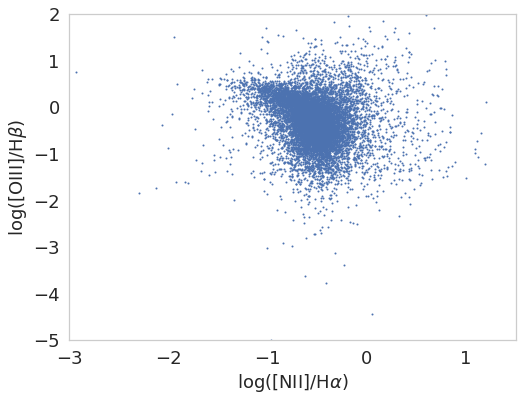

In [10]:
plt.rcParams.update(params)
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN diagram

In [11]:
x2 = data_WHAN['NIIR_FLUX_COMP']/data_WHAN['HA_FLUX_COMP']
y2 = data_WHAN['HA_EW_COMP']

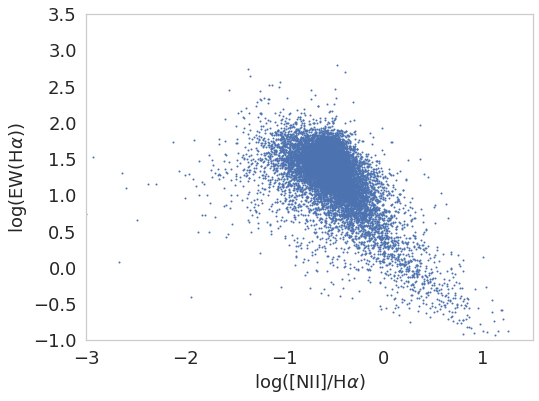

In [12]:
plt.plot(np.log10(x2), np.log10(y2), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Diagrams for RSF

# BPT

In [13]:
x3 = data_rsf_BPT['NIIR_FLUX_COMP']/data_rsf_BPT['HA_FLUX_COMP']
y3 = data_rsf_BPT['OIIIR_FLUX_COMP']/data_rsf_BPT['HB_FLUX_COMP']

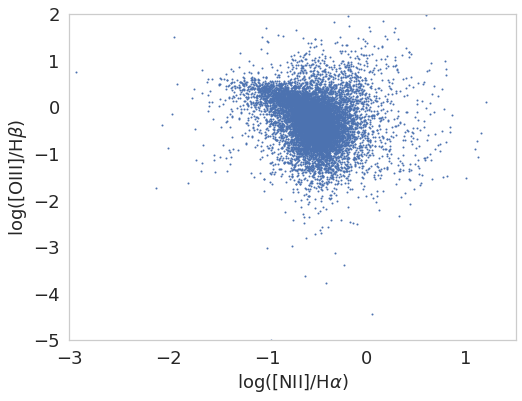

In [14]:
plt.plot(np.log10(x3), np.log10(y3), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN

In [15]:
x4 = data_rsf_WHAN['NIIR_FLUX_COMP']/data_rsf_WHAN['HA_FLUX_COMP']
y4 = data_rsf_WHAN['HA_EW_COMP']

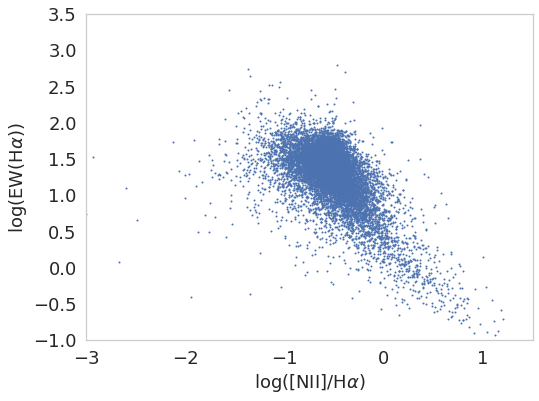

In [16]:
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Diagrams for UV weak

# BPT

In [17]:
x5 = data_uvweak_BPT['NIIR_FLUX_COMP']/data_uvweak_BPT['HA_FLUX_COMP']
y5 = data_uvweak_BPT['OIIIR_FLUX_COMP']/data_uvweak_BPT['HB_FLUX_COMP']

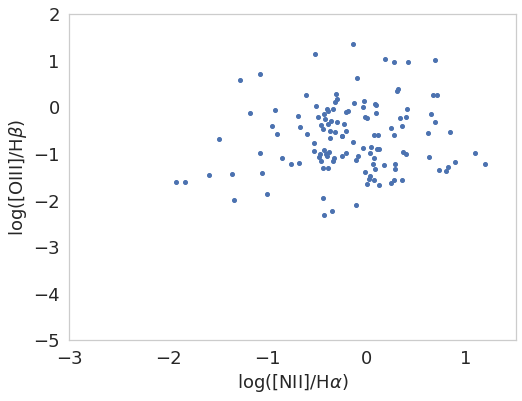

In [18]:
plt.plot(np.log10(x5), np.log10(y5), ls='', marker='o', markersize=4)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN

In [19]:
x6 = data_uvweak_WHAN['NIIR_FLUX_COMP']/data_uvweak_WHAN['HA_FLUX_COMP']
y6 = data_uvweak_WHAN['HA_EW_COMP']

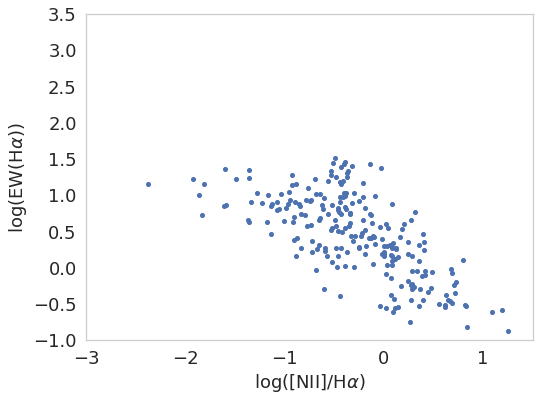

In [20]:
plt.plot(np.log10(x6), np.log10(y6), ls='', marker='o', markersize=4)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Diagrams for UV upturn

# BPT

In [21]:
x7 = data_uvupturn_BPT['NIIR_FLUX_COMP']/data_uvupturn_BPT['HA_FLUX_COMP']
y7 = data_uvupturn_BPT['OIIIR_FLUX_COMP']/data_uvupturn_BPT['HB_FLUX_COMP']

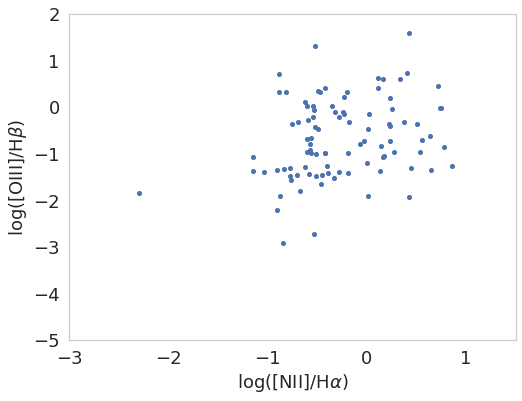

In [22]:
plt.plot(np.log10(x7), np.log10(y7), ls='', marker='o', markersize=4)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)
plt.show()

# WHAN

In [23]:
x8 = data_uvupturn_WHAN['NIIR_FLUX_COMP']/data_uvupturn_WHAN['HA_FLUX_COMP']
y8 = data_uvupturn_WHAN['HA_EW_COMP']

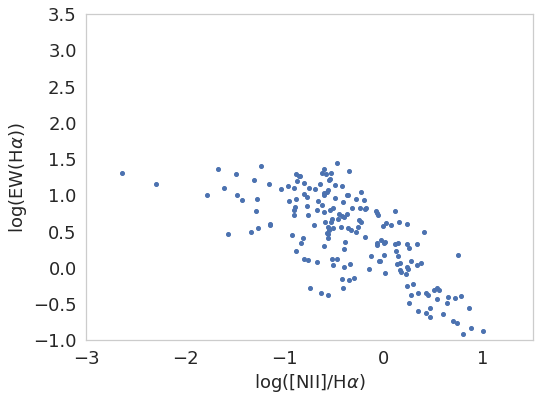

In [24]:
plt.plot(np.log10(x8), np.log10(y8), ls='', marker='o', markersize=4)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.show()

# Extra plots

In [25]:
palette = ['#66c2a5', '#fc8d62', '#8da0cb']

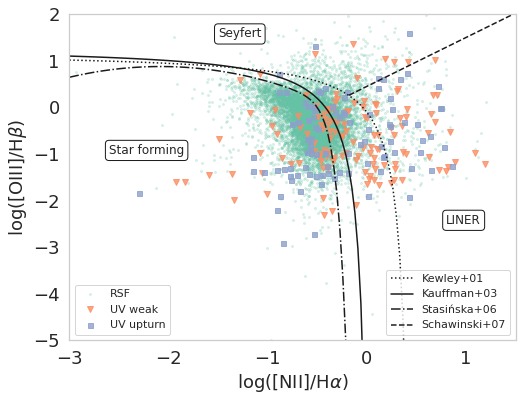

In [26]:
lines = []
lines += plt.plot(np.log10(x3), np.log10(y3), ls='', marker='o', markersize=2, c=palette[0], alpha=0.2, label='RSF')
lines += plt.plot(np.log10(x5), np.log10(y5), ls='', marker='v', markersize=6, c=palette[1], alpha=0.8, label='UV weak')
lines += plt.plot(np.log10(x7), np.log10(y7), ls='', marker='s', markersize=5, c=palette[2], alpha=0.8, label='UV upturn')

xx1 = np.linspace(-3, 0.4, 100)
xx2 = np.linspace(-3, 0, 100)
xx3 = np.linspace(-3, 0, 100)
xx4 = np.linspace(-0.18, 1.5, 100)

lines += plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
lines += plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
lines += plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
lines += plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.text(-1.5, 1.5, 'Seyfert', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(-2.6, -1.0, 'Star forming', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(0.8, -2.5, 'LINER', bbox=dict(boxstyle="round", ec='k', fc='w'))

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-5,2)

legend1 = plt.legend(lines[:3], ['RSF', 'UV weak', 'UV upturn'], loc='lower left')
plt.legend(lines[3:], ['Kewley+01', 'Kauffman+03', 'Stasińska+06', 'Schawinski+07'], loc='lower right')
plt.gca().add_artist(legend1)

plt.show()

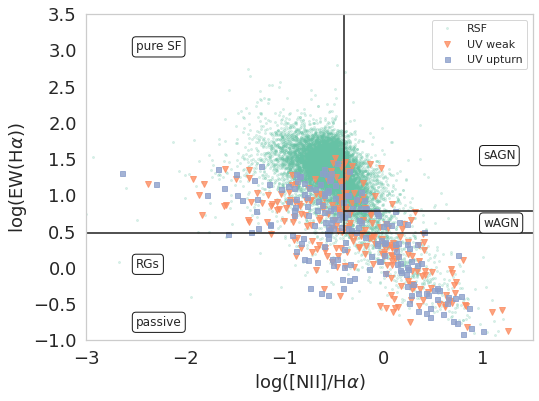

In [27]:
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=2, c=palette[0], alpha=0.2, label='RSF')
plt.plot(np.log10(x6), np.log10(y6), ls='', marker='v', markersize=6, c=palette[1], alpha=0.8, label='UV weak')
plt.plot(np.log10(x8), np.log10(y8), ls='', marker='s', markersize=5, c=palette[2], alpha=0.8, label='UV upturn')

xx5 = np.linspace(-3, -0.4, 100)
xx6 = np.linspace(-0.4, 1.5, 100)
xx7 = np.linspace(np.log10(3), 3.5, 100)

plt.plot(xx5, horizontal(xx5, np.log10(3)), ls='-', c='k') # pure SF
plt.plot(xx6, horizontal(xx6, np.log10(6)), ls='-', c='k') # sAGN
plt.plot(xx6, horizontal(xx6, np.log10(3)), ls='-', c='k') # wAGN
plt.plot(vertical(xx7, -0.4), xx7, ls='-', c='k')

plt.text(-2.5, 3.0, 'pure SF', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(1.0, 1.5, 'sAGN', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(1.0, 0.57, 'wAGN', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(-2.5, 0.0, 'RGs', bbox=dict(boxstyle="round", ec='k', fc='w'))
plt.text(-2.5, -0.8, 'passive', bbox=dict(boxstyle="round", ec='k', fc='w'))

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,1.5)
plt.ylim(-1,3.5)
plt.legend()
plt.show()

# Heatmaps

# RSF

In [28]:
labels = [r'NUV$-$r', r'RUV$-$r', r'FUV$-$NUV', r'M$_\mathrm{NUV}$', r'M$_\mathrm{FUV}$', r'M$_\mathrm{r}$', 
          r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$', r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$', 
          r'$\mathrm{EW}(\mathrm{H}\alpha)$', r'$\mathrm{EW}(\mathrm{H}\beta)$', 
          r'$\log([\mathrm{NII}]/[\mathrm{OIII}])$', r'D$_n$4000']

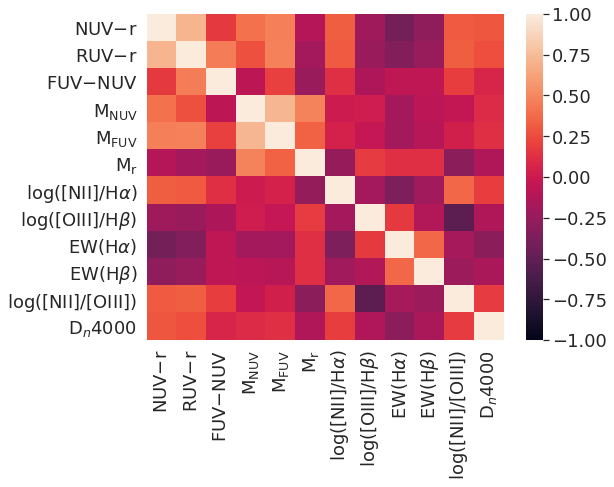

In [29]:
sns.heatmap(data=heatmap_rsf_df.corr(method='kendall'), vmin=-1., vmax=1., yticklabels=labels, xticklabels=labels)
plt.show()

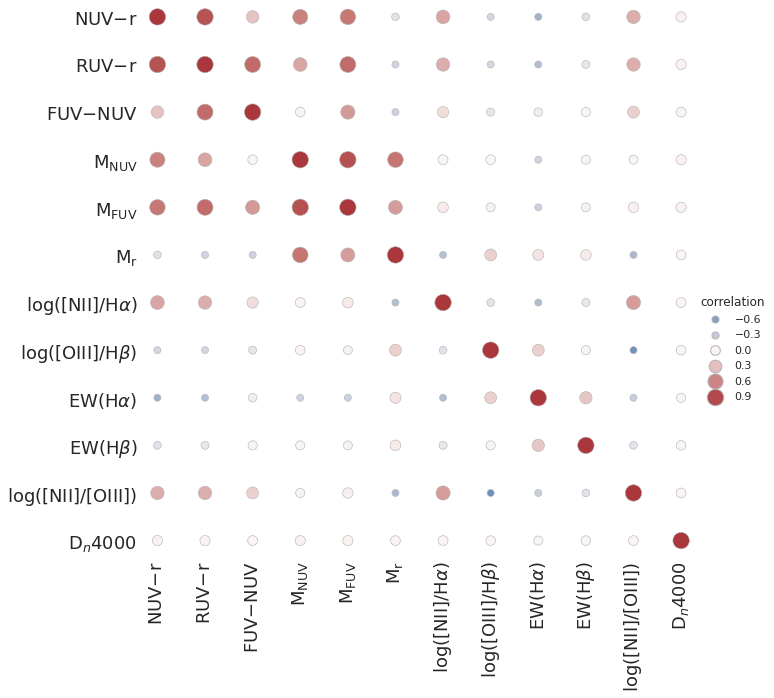

In [30]:
corr_mat_rsf = heatmap_rsf_df.corr().stack().reset_index(name="correlation")

g_rsf = sns.relplot(
    data=corr_mat_rsf,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 270), size_norm=(-.2, .8),
)

g_rsf.set(xlabel="", ylabel="", aspect="equal")
g_rsf.despine(left=True, bottom=True)
g_rsf.ax.margins(.02)

g_rsf.ax.set_xticks(g_rsf.ax.get_xticks())
g_rsf.ax.set_xticklabels(labels)
g_rsf.ax.set_yticks(g_rsf.ax.get_yticks())
g_rsf.ax.set_yticklabels(labels)

for label in g_rsf.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g_rsf.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

# UV weak

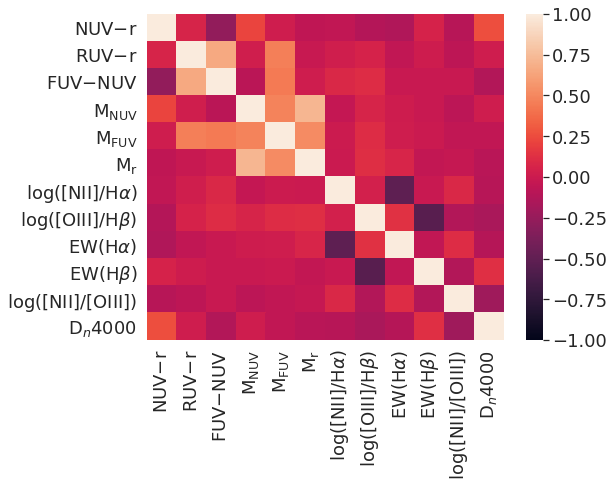

In [31]:
sns.heatmap(data=heatmap_uvweak_df.corr(method='kendall'), vmin=-1., vmax=1., yticklabels=labels, xticklabels=labels)
plt.show()

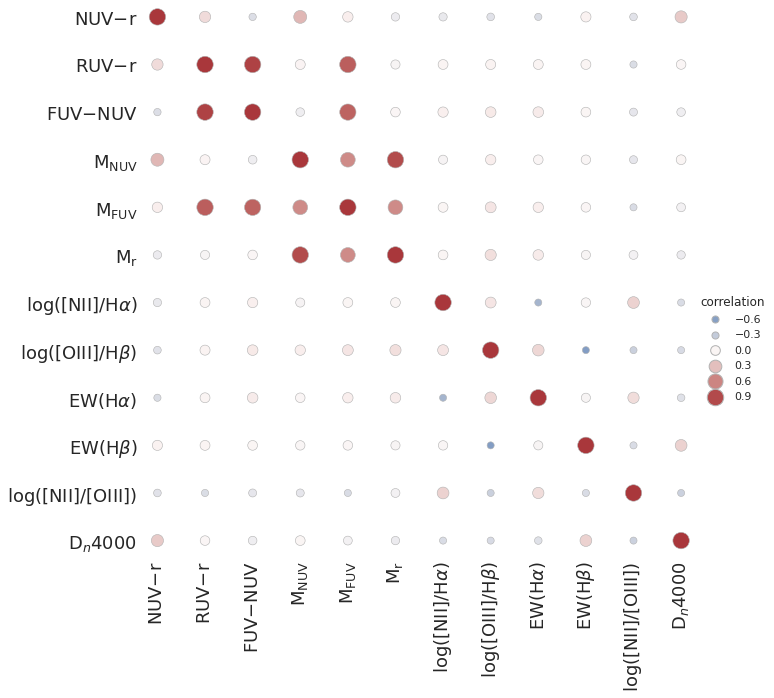

In [32]:
corr_mat_uvweak = heatmap_uvweak_df.corr().stack().reset_index(name="correlation")

g_uvweak = sns.relplot(
    data=corr_mat_uvweak,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 270), size_norm=(-.2, .8),
)

g_uvweak.set(xlabel="", ylabel="", aspect="equal")
g_uvweak.despine(left=True, bottom=True)
g_uvweak.ax.margins(.02)

g_uvweak.ax.set_xticks(g_uvweak.ax.get_xticks())
g_uvweak.ax.set_xticklabels(labels)
g_uvweak.ax.set_yticks(g_uvweak.ax.get_yticks())
g_uvweak.ax.set_yticklabels(labels)

for label in g_uvweak.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g_uvweak.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

# UV upturn

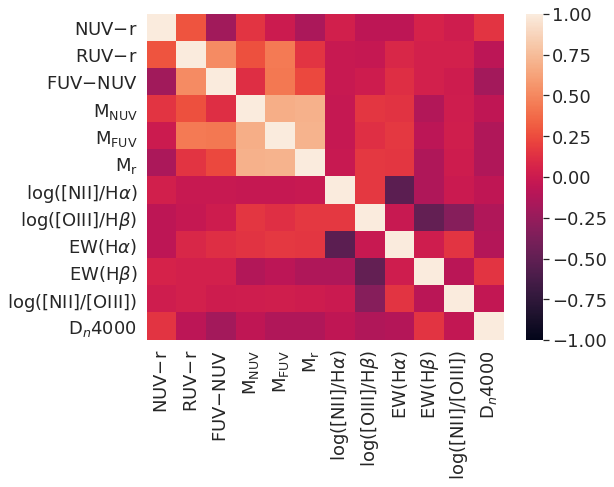

In [33]:
sns.heatmap(data=heatmap_uvupturn_df.corr(method='kendall'), vmin=-1., vmax=1., yticklabels=labels, xticklabels=labels)
plt.show()

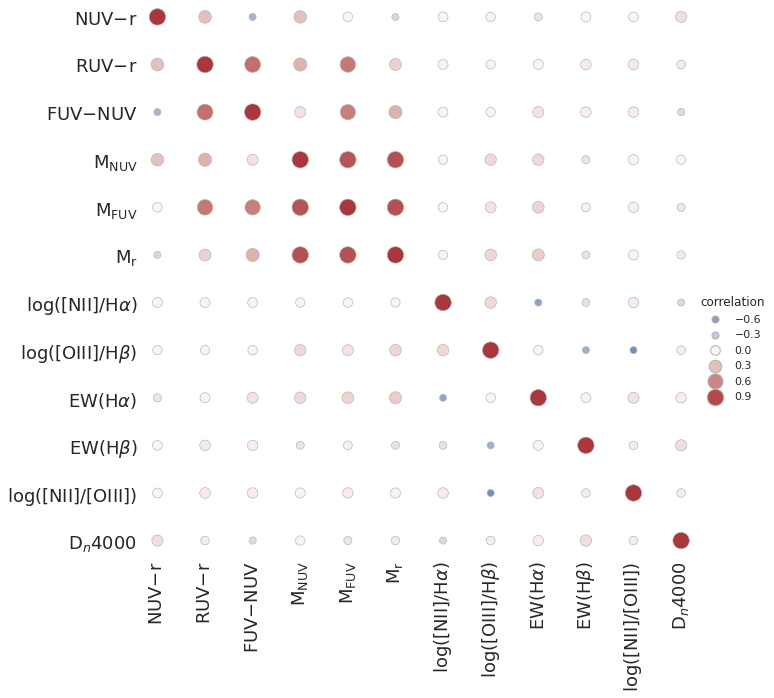

In [34]:
corr_mat_uvupturn = heatmap_uvupturn_df.corr().stack().reset_index(name="correlation")

g_uvupturn = sns.relplot(
    data=corr_mat_uvupturn,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 270), size_norm=(-.2, .8),
)

g_uvupturn.set(xlabel="", ylabel="", aspect="equal")
g_uvupturn.despine(left=True, bottom=True)
g_uvupturn.ax.margins(.02)

g_uvupturn.ax.set_xticks(g_uvupturn.ax.get_xticks())
g_uvupturn.ax.set_xticklabels(labels)
g_uvupturn.ax.set_yticks(g_uvupturn.ax.get_yticks())
g_uvupturn.ax.set_yticklabels(labels)

for label in g_uvupturn.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g_uvupturn.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()